FEUILLE DE TP 3

---
# Résolution numérique d'EDOs
---

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np                       # pour les numpy array
import matplotlib.pyplot as plt          # librairie graphique

$\newcommand{\ds}{\displaystyle}$
$\newcommand{\R}{{\mathbb R}}$

Nous allons programmer quelques méthodes pour construire une solution approchée du problème de Cauchy 
\begin{equation}
\left\lbrace
\begin{aligned}
&y'(t)= f(t, y(t)),&& t>0,\\
&y(0) = y_0.
\end{aligned}
\right.
\tag{1}\label{1}
\end{equation}

On va calculer des valeurs approchées de la solutions aux instants $t_n =n\Delta t$, où $\Delta t>0$ est un __pas de temps__ choisi arbitrairement. On dénote $ y^n $ la valeur approchée de $ y( t_n ) $ à l'instant $ t_n $. 

## 1. Méthode d'Euler
La méthode d'Euler consiste à construire la suite $ y^n $ des valeurs approchées de $ y( t^n ) $, $ n = 0, 1, \ldots, N $, via les relations suivantes:
\begin{equation}
\left\lbrace
\begin{aligned}
& y^{ n + 1 } = y^n + \Delta t f( t_n, y^n ), \quad n = 0, 1, 2, \ldots, N - 1, \\
&y^0 = y_0.
\end{aligned}
\right.
\end{equation}

**EXERCICE 1**

Plutôt que de fixer $\Delta t$, nous préférons ici pour simplifier fixer le nombre $N$ de pas de temps. C'est-à-dire que nous avons $\Delta t=T/N$ : les instants où la solution numérique est calculée seront donc
$$ t_0 = 0, t_1=\Delta t, \ldots, t_N=N\Delta t, \qquad \Delta t=\frac{T}{N}.$$

> 1. Programmez la méthode d'Euler afin de calculer la solution approchée d'un problème de Cauchy scalaire ( i.e. où l'inconnue est à valeurs dans $\R$) générique. On écrira une fonction `euler(f, y_0, T, N, *args)` qui renvoie deux tableaux : `t`, constitué des instants $0, \Delta t, 2\Delta t,\ldots, N\Delta t = T$ et `y`, constitué des valeurs de la solution approchée en ces instants.
> 2. Testez votre méthode sur l'équation de Malthus, en représentant la solution et plusieurs solutions approchées (pour différents valeurs de $N$ : 10, 20, 50, 100, 200, 500, 1000) sur le même graphique. On pourra prendre $ r = 1 $ dans le modèle de Malthus, $ y_0 = 0.1 $, $ T = 5 $. Ajouter un titre et une légende.

In [176]:
def euler(f, y_0, T, N):
    """
    méthode d'Euler explicite pour la résolution d'un problème de Cauchy
    
    Parameters
    ----------
    
    f: function
        la fonction qui définit le problème de Cauchy y'=f(t, y)
    y_0: float
        la valeur initiale de la solution à t=0
    T: float
        le temps final pour le calcul de la solution
    N: int
        le nombre de pas de temps
    *args:
        autres arguments optionnels
        
    Return
    ------
    
    t: ndarray
        les instants où la solution approchée est calculée
    y: ndarray
        les valeurs de la solution approchée
    """
    t = np.zeros(N+1)
    y = np.zeros(N+1)
    
    y[0] = y_0
    
    for n in range(N):
        t[n] = n * (T/N)
        y[n+1] = y[n] + (T/N)*f(t[n],y[n])
    t[-1] = T
        
    return (t, y)

In [88]:
def f_malthus(t, x, r = 1):
    """fonction second membre du problème de Malthus"""
    return r * x

def sol_exacte_malthus(t, y0, r = 1):
    """solution analytique du problème de Malthus"""
    return y0*np.exp(r*t)


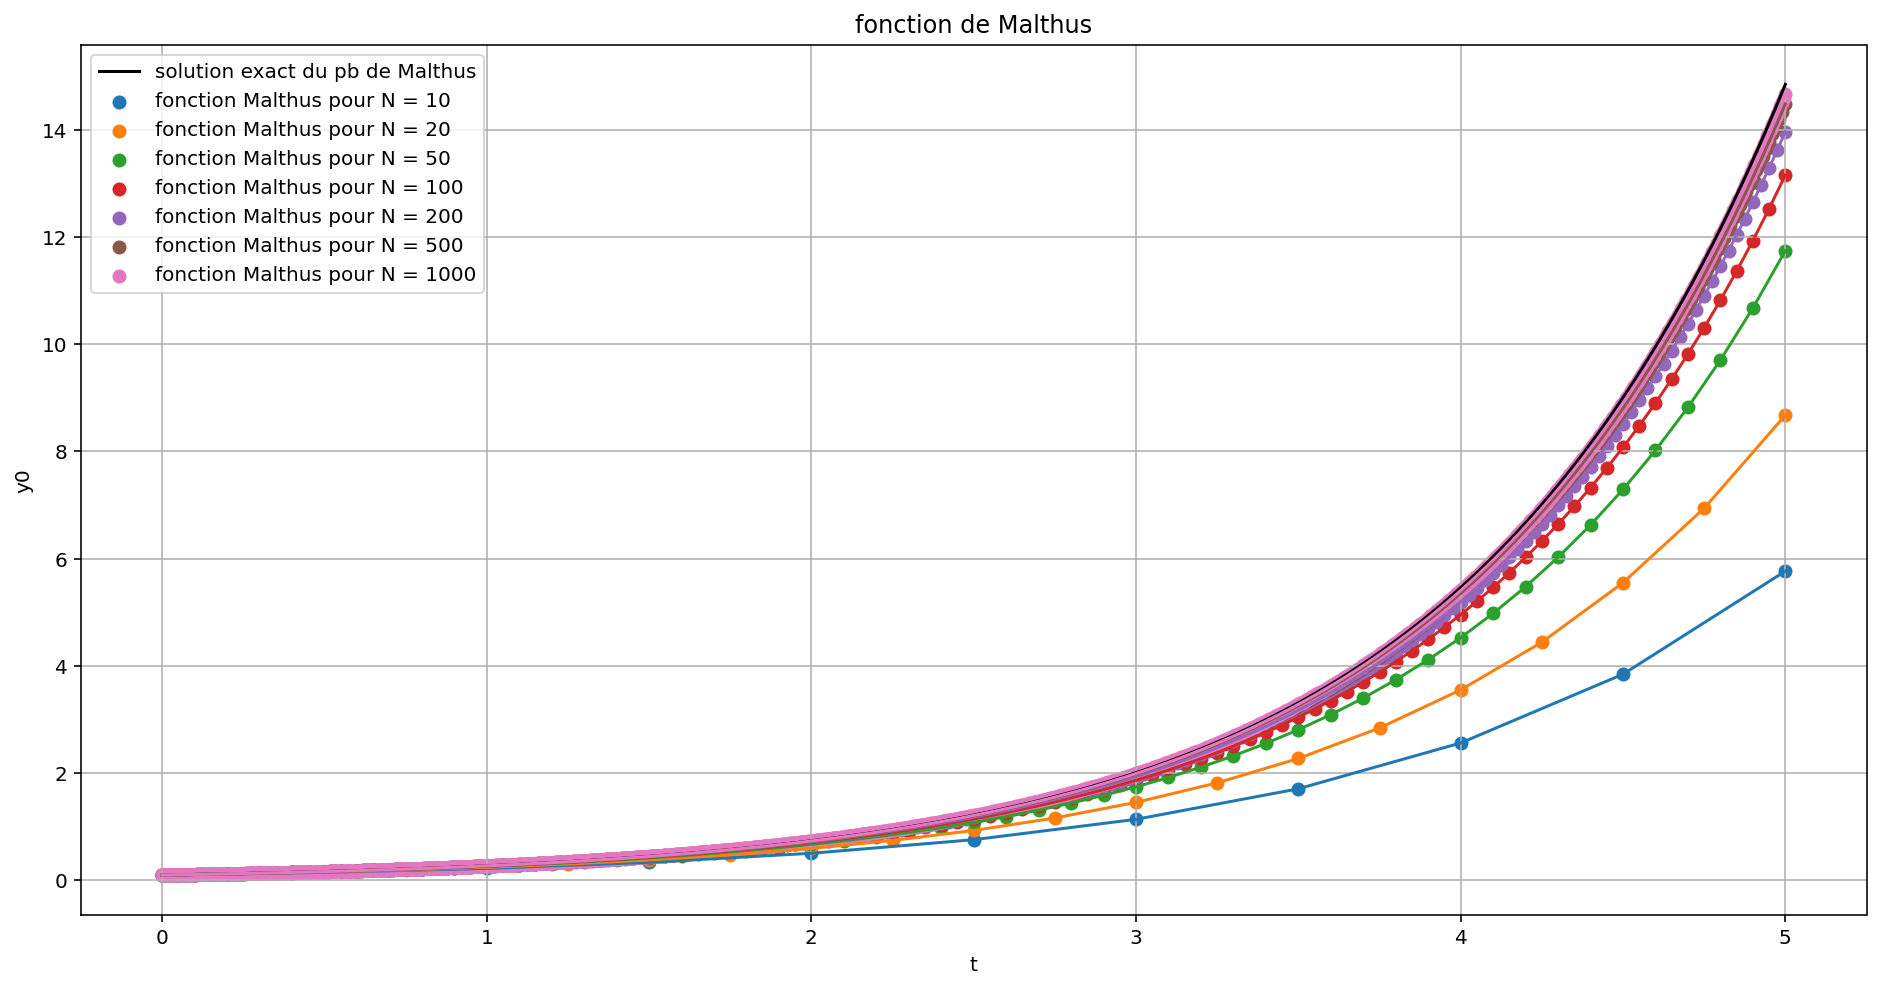

In [127]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t,sol_exacte_malthus(t, y0 = 0.1, r = 1),label = f'solution exact du pb de Malthus',color = 'black')

N = [10,20,50,100,200,500,1000]

for i in range(len(N)):
    t,y = euler(f_malthus,y_0 = 0.1,T = 5, N = N[i])
    ax.scatter(t,y,label = f'fonction Malthus pour N = {N[i]}')
    ax.plot(t,y)
    ax.grid(True)
    ax.set_title(f'fonction de Malthus')
    ax.set_xlabel(f't')
    ax.set_ylabel(f'y0')
    ax.legend()
    


### Erreur du schéma


L'erreur locale du schéma à l'instant $t_n$ est la quantité

\begin{equation}
e_n = \vert y^n -y(t_n)\vert,
\end{equation}

et l'erreur globale du schéma est le maximum sur tous les instants de l'erreur locale :

\begin{equation}
e=\max_n e_n.
\end{equation}

On dit que le schéma est _convergent_ lorsque $e$ tend vers 0 quand le pas $\Delta t$ tend vers 0.

**EXERCICE 2**

> * Pour l'équation de Malthus ci-dessus, calculez et affichez les erreurs globales du schéma d'Euler pour différentes valeurs de $\Delta t$. 
> * Ce schéma vous semble-t-il convergent ?

*Indication : pour calculer l'erreur `e`, vous pourrez utiliser la fonction `norm` du package `numpy.linalg` ou bien faire le calcul à la main.*

In [182]:
liste_N = np.array([10, 20, 50, 100, 200, 500, 1000])  # pas de temps
liste_erreur = np.zeros(liste_N.size)

for k, N in enumerate(liste_N):
    t, sol_appr = euler(f_malthus,y_0 = 0.1,T = 5, N = N )
    sol_ex = sol_exacte_malthus(t,y0 = 0.1,r = 1)
    liste_erreur[k] = np.linalg.norm(sol_appr - sol_ex,ord = np.inf)


**EXERCICE 3**

On dit qu'un schéma est d'ordre $p$ lorsque $e=O((\Delta t)^p)$ quand $\Delta t\to 0$ (pour les fonctions $f$ régulières).

> 1. Tracez $e$ en fonction de $\Delta t$ pour l'équation de Malthus.
> 2. Tracez sur le même graphique les courbes $y = C\Delta t^p$ pour $p=$ 0.5, 1, 2 et où $C=\frac{e[-1]}{\Delta t[-1]^p}$ qui correspond à la plus petite valeur de pas de temps.
> 3. Passez en échelle logarithmique en $x$ et en $y$ à l'aide des commandes 'ax.set_xscale("log")' et 'ax.set_yscale("log")'
> 4. Estimez l'ordre de convergence apparent du schéma d'Euler pour l'équation de Malthus. Le résultat obtenu est-il conforme avec le résultat vu en cours?

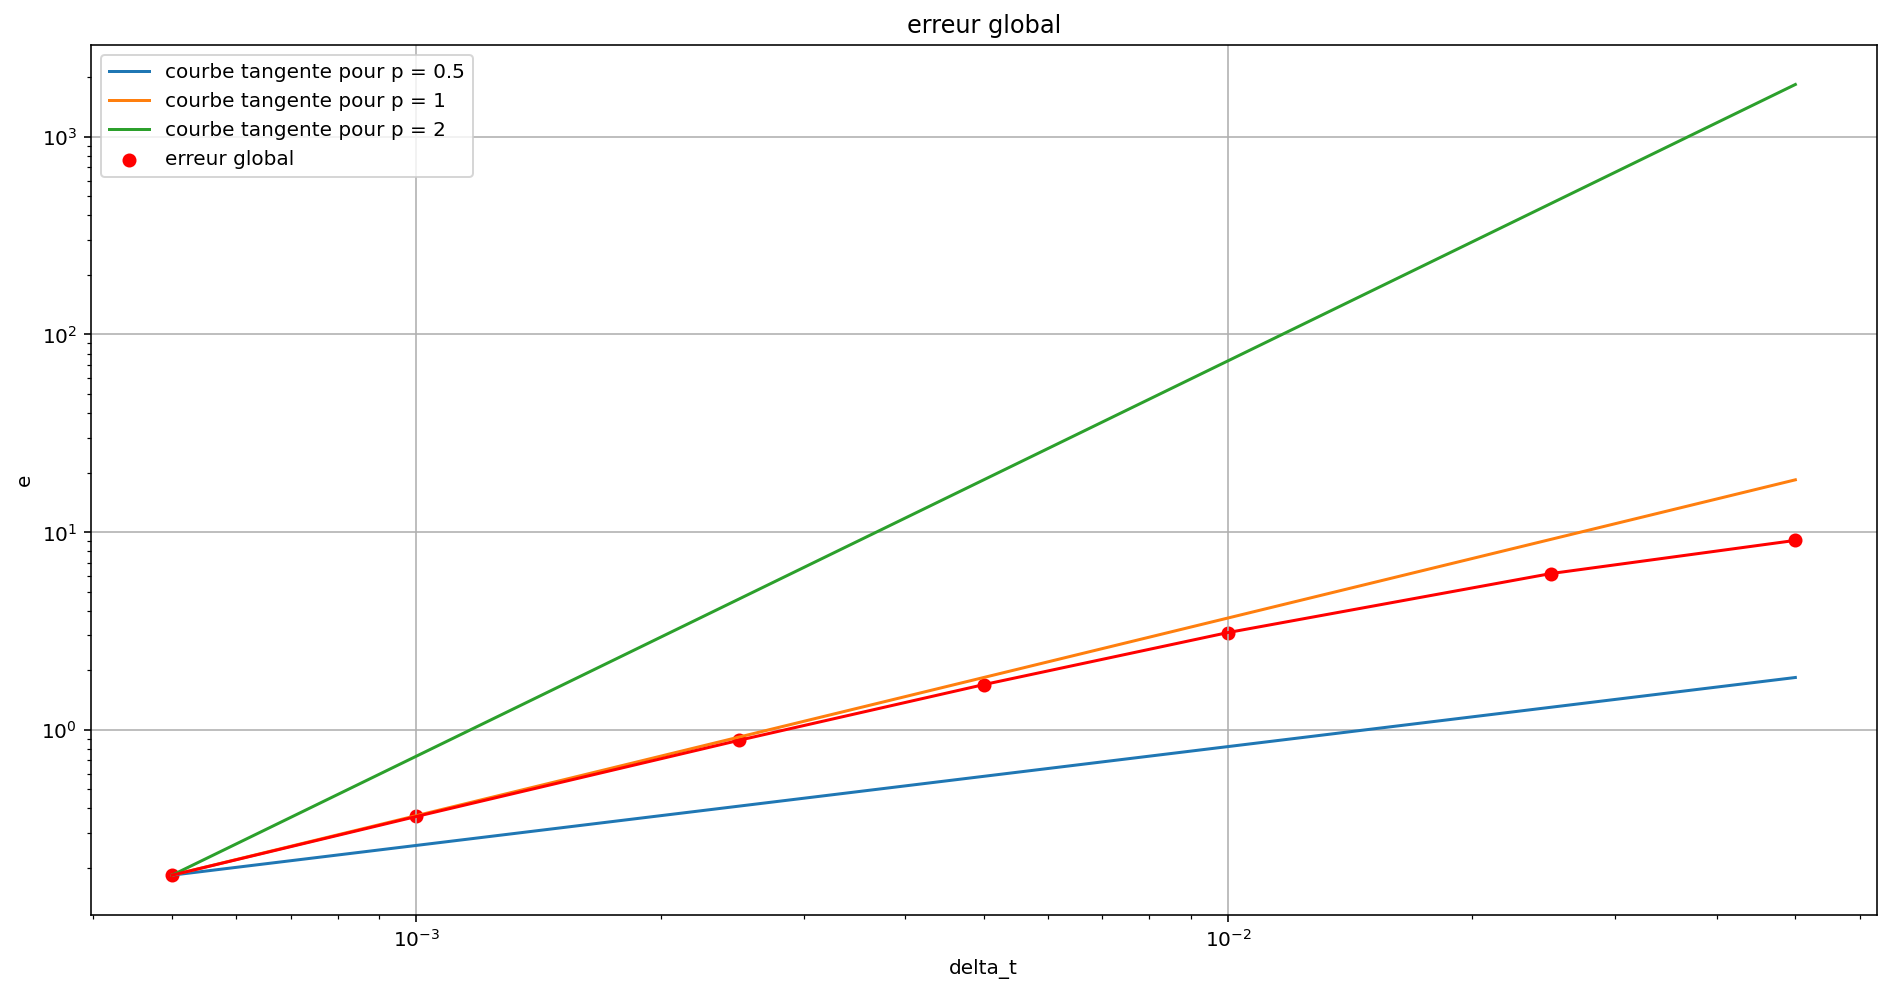

In [183]:
T = 0.5
liste_p = [0.5,1,2]

delta_T = T / liste_N

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)

for p in liste_p:
    ax.plot(delta_T, (liste_erreur[-1]/delta_T[-1]**p)*delta_T**p, label = f'courbe tangente pour p = {p}')
 
ax.scatter(delta_T,liste_erreur,label = f'erreur global',color='r')
ax.plot(delta_T,liste_erreur,color='r')
ax.grid(True)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title(f'erreur global')
ax.set_xlabel(f'delta_t')
ax.set_ylabel(f'e')
ax.legend()

**EXERCICE 4**
 
> 1. Appliquez le schéma d'Euler à la résolution numérique du problème de Verhulst ($r=2$, $K=1$ par exemple,  comme dans le TP1).
>
> On prend $y_0=0.1$ et on veut résoudre le problème sur l'intervalle $[0,20]$. Prenez des valeurs de $\Delta t$ entre 1 et 0.2. Que remarquez-vous?
>
> 2. Calculez l'erreur globale apparente du schéma d'Euler pour l'équation de Verhulst. Estimez l'ordre de convergence apparent du schéma d'Euler pour l'équation de Verhulst.

In [184]:
def f_Verhulst(t, y, r, K):
    """fonction qui définit l'équation différentielle"""
    return r*y*(1-y/K)

def sol_exact_Verhulst(t, y0 ,r , K):
    """Solution du problème de Verhulst"""
    return 𝐾/(1+(𝐾/y0 - 1)*np.exp(-r*t))

TypeError: can only concatenate tuple (not "int") to tuple

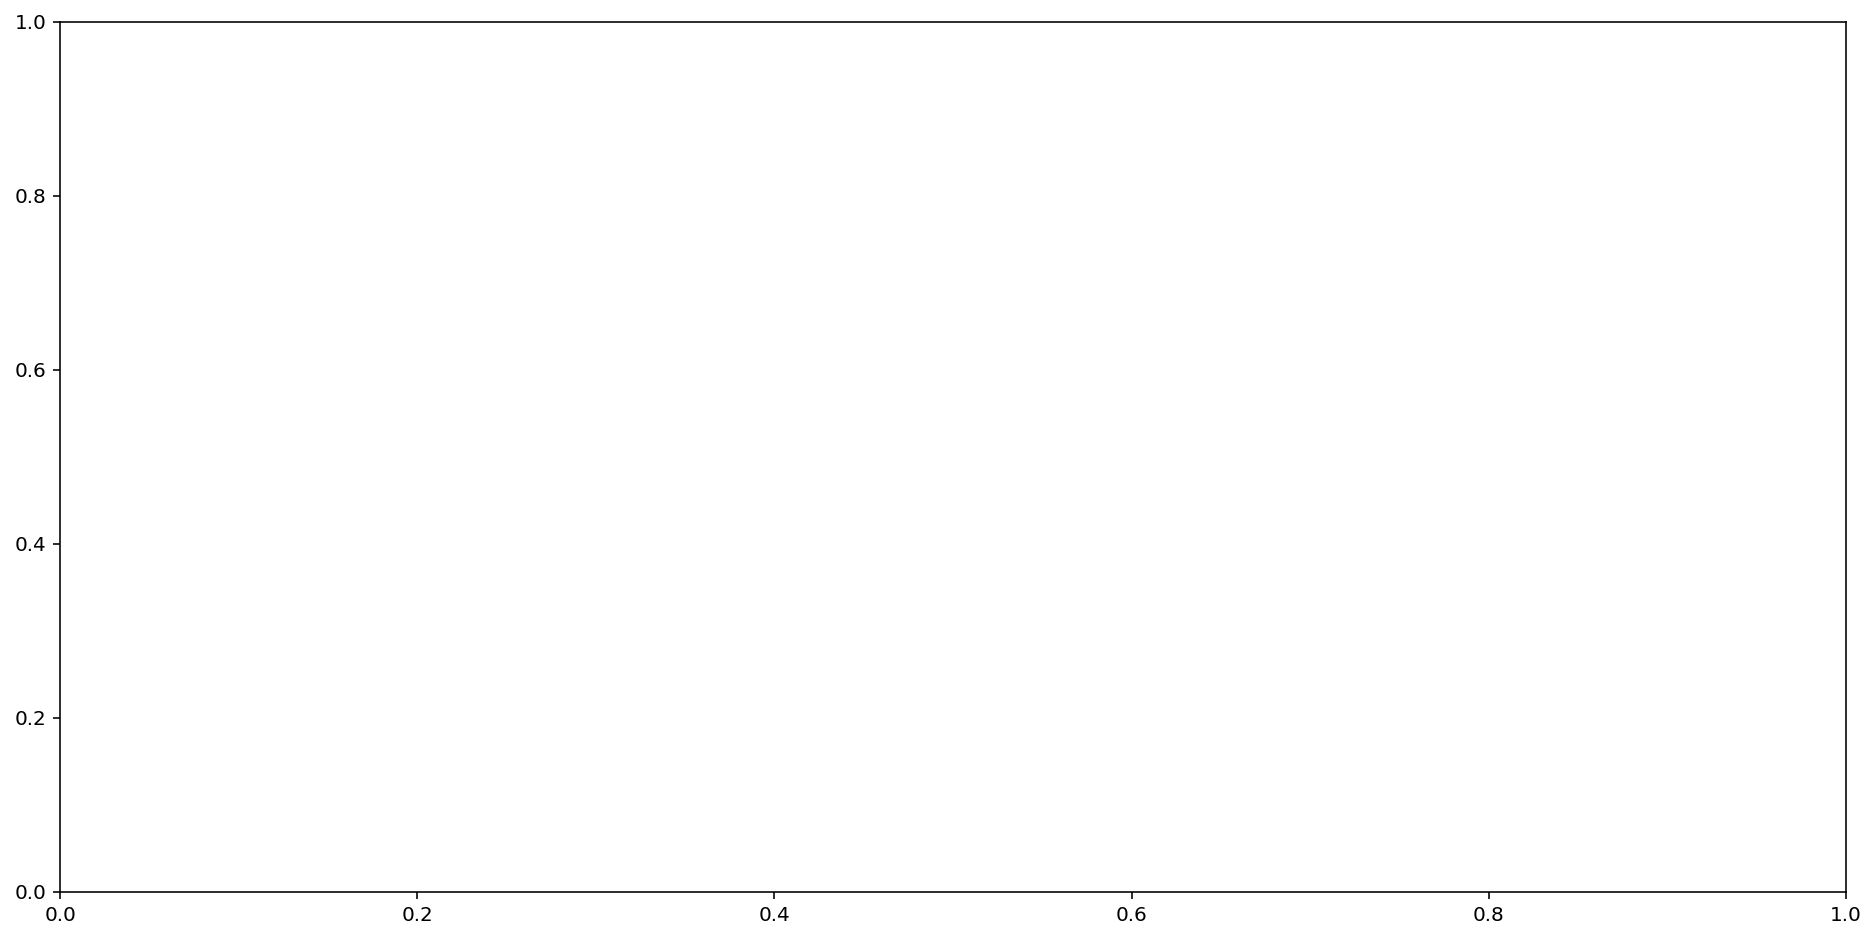

In [186]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)


N = np.linspace(0,20)

for i in enumerate(N):
    t,y = euler(f_Verhulst,y_0 = 0.1,T = 5, N = i)
    ax.scatter(t,y,label = f'fonction Malthus pour N = {i}')
    ax.plot(t,y)
    ax.grid(True)
    ax.set_title(f'fonction de Malthus')
    ax.set_xlabel(f't')
    ax.set_ylabel(f'y0')
    ax.legend()

## 2. Schéma du point du milieu
Le schéma du point milieu s'écrit:
\begin{equation}
\left\{
\begin{array}{lcl}
    y^{n+1} &=& y^n + \Delta t \ f(t^{n+1/2},y^{n+1/2}), \quad n = 0, 1, 2, \ldots, N - 1, \\
    t^{n+1/2} &=& t_n + \frac{\Delta t}{2},\\
    y^{n+1/2} &=& y^n + \frac{\Delta t}{2} f(t_n,y^n),\\
    y^0 = y_0.
\end{array}
\right .
\end{equation}

**EXERCICE 5**

> 1. Programmez la méthode du point milieu (sur le même modèle que la fonction `euler`) afin de calculer la solution approchée d'un problème de Cauchy scalaire (i.e. où l'inconnue est à valeurs dans $\mathbb{R}$) générique. On écrira une fonction `milieu(f, y_0, T, N, *args)` qui renvoie deux tableaux : `t`, constitué des instants $0, \Delta t, 2\Delta t,\ldots, N\Delta t=T$ et `y`, constitué des valeurs de la solution approchée en ces instants.
> 2. Testez votre méthode sur l'équation de Malthus, en représentant la solution et plusieurs solutions approchées (pour différents valeurs de $N$ : 10, 20, 50, 100, 200, 500, 1000) sur le même graphique. On pourra prendre $ r = 1 $ dans le modèle de Malthus, $ y_0 = 0.1 $, $ T = 5 $. Ajouter un titre et une légende.

**EXERCICE 6**

> Pour l'équation de Malthus ci-dessus, calculez et affichez les erreurs globales du schéma du point milieu pour différentes valeurs de $\Delta t$. Ce schéma vous semble-t-il convergent ?
> Estimez l'ordre de convergence du schéma du point milieu pour l'équation de Malthus.

**EXERCICE 7**

> Reprenez les questions 5 et 6 pour l'équation de Verhulst.

## 3. Schéma de Crank-Nicolson

Le *schéma de Crank-Nicolson* consiste à construire la suite $ y^n $ des valeurs approchées de $ y( t^n ) $, $ n = 0, 1, \ldots, N $, via les relations suivantes:

\begin{equation*}
\left\lbrace
\begin{aligned}
& y^{ n+1 } = y^n + \frac{\Delta t}{ 2 }\left( f( t_{ n }, y^{ n } ) + f( t_{ n+1 }, y^{ n+1 } )
\right), \quad n = 0, 1, 2, \ldots, N-1, \\
& y^0 = y_0.
\end{aligned}
\right.
\end{equation*}


**EXERCICE 8 (exercice noté)**
> 1. Le schéma de Crank-Nicolson est-il explicite ou implicite? Justifiez votre réponse. 
> 2. Pour la fonction $ f $ définie par $ f( t, y ) = r y $ écrivez la relation qui donne $y^{n+1}$ en fonction de $y^n$ pour le schéma de Crank-Nicolson.
> 3. Programmez la méthode *crank_nicolson* afin de calculer la solution approchée du problème de Cauchy du modèle de Malthus. On écrira une fonction `crank_nicolson` qui prend en argument un nombre `y0` (la valeur initiale de la concentration), un nombre `T` (la longueur de l'intervalle de temps), un nombre $ N $ (le nombre de points) et un nombre `r` (le taux de croissance dans le modèle de Malthus), et qui retourne deux tableaux : `t`, constitué des instants $ 0, \Delta t, 2 \Delta t, \ldots, N \Delta t $, avec $ \Delta t = T / N $, et `y`, constitué des valeurs de la solution approchée en ces instants. On étudiera le modèle de Malthus avec $ r = -4 $ et on prendra $ y_0 = 1 $, $ T = 16 $.
> 4. Pour la méthode d'Euler explicite et pour le schéma de Crank-Nicolson, tracez sur un même graphique, la solution exacte et les solutions approchées du modèle de Malthus pour les valeurs $ N = 31, 32, 33, 34$. 
Commentez le graphique obtenu. Pour trouver une solution approchée du modèle de Malthus étudié quelle méthode numérique choisiriez-vous ? Expliquez votre choix. 
> 5. Pour l'équation de Malthus, calculez et affichez les erreurs globales du schéma de Crank-Nicolson pour différentes valeurs de $\Delta t$. Estimez l'ordre de convergence du schéma de Crank-Nicolson pour l'équation de Malthus. L'ordre de convergence du schéma de Crank-Nicolson est-il plus elevé que l'ordre de convergence du schéma d'Euler implicite?

In [2]:
def crank_nicolson(y0, T, N, r):
    """
    schéma de Crank-Nicolson pour le modèle de Malthus 
    
    Parameters
    ----------
    
    y0: float
        donnée initiale
    T: float
        instant final
    N: int
        nombre de pas de temps
    r: float
       taux de croissance dans le modèle de Malthus

    Returns
    -------
    
    t: ndarray
        les instants où la solution approchée est calculée
    y: ndarray
        les valeurs de la solution approchée par le theta-schema
    """
    
    ## COMPLETEZ 
    
    

In [ ]:
r = -4
liste_N = [31, 32, 33, 34]
T = 16
y0 = 1

fig = plt.figure(figsize=(16, 6))

# Schéma d'Euler explicite
ax = fig.add_subplot(1, 2, 1)

## COMPLETEZ 

# Schéma de Crank-Nicolson
ax = fig.add_subplot(1, 2, 2)

## COMPLETEZ 

In [2]:
liste_N = np.array([20, 40, 60, 80, 100])
liste_delta = T / liste_N
liste_erreurs = None

## COMPLETEZ